# Final Exam

#### Tues 12/13 @ 8am - Weds 12/14 @ 5pm EST.
#### 3 hours and 30 minutes


### Instructions

**Before you turn this exam in, make sure everything runs as expected: in the menubar, select `Kernel` $\rightarrow$ `Restart & Run All`. If you have failing tests, then you may need to use `Cell` $\rightarrow$ `Run All Below` to execute cells past the failing tests. After running all (functional) cells in order you should leave the output in the notebook and submit.**

Any `assert` statements are provided to check your answers. Unlike auto-graded sections in homework assignments, **you may receive partial (or full) credit even if these code blocks fail**, and you may not receive full credit even if they pass (e.g. if you hack them to pass). Problems without `assert` statements may have multiple correct solutions, and will be manually graded by instructors.

Make sure you fill in any place that says `# Start your code here`. Please also write your name and official GT ID below.

### The timer is strict, be sure to submit in time!

You may submit the exam up to 20 times. If you plan to work up until the very end of the timer please be sure to submit a nearly-complete version 5 minutes ahead of time to ensure that you don't lose your work if you barely miss the timer. The exam should auto-submit at the end, but it is strongly suggested that you manually submit a few minutes ahead of time to be safe.

In [ ]:
NAME = ""
GTID = "" #e.g. gburdell0

## Logistical Notes and Instructions

Failure to follow these instructions may negatively impact your grade.

* Your exam must be submitted prior to the timer ending on your Canvas quiz. **Accessing the Vocareum assignment after the timer expires or downloading the exam file without permission will be considered an honor code violation.** Vocareum logs record all access times and downloads. If you need to download the exam due to an emergency (e.g. unable to submit at the last minute) that is okay, but please notify instructors immediately.

* You have **180 minutes to complete the exam**, and you have 30 extra minutes to deal with any logistical issues that may arise or take a break. This means minor technical issues that are resolved in $<$10 minutes will not result in an extension of the timer, and that you should have plenty of time to run everything and submit the exam. If you encounter unexpected technical issues please notify instructors immediately to establish a contingency plan.

* If you have issues or questions please contact instructors via a **private Canvas message**. Do not use any other means of communication during the exam. Instructors will monitor Canvas closely during the "office hours" (see Canvas announcement) and as often as possible in between. It is strongly recommended that you begin the exam during one of these windows. If you are unable to use Canvas or need to get in touch immediately you may call or text Dr. Medford's cell phone at 650-213-2306.

* Instructors will **not answer questions related to content** in order to ensure a fair experience for everyone. In the case of ambiguities, typos, or possible errors you will be asked to use your best judgement, so **please restrict questions to technical issues that hinder your ability to complete the exam.**

* You may use any online resources or your own notes on the exam. However, you may not communicate with any of your classmates regarding the exam at any point during the exam time window. **Inappropriate communication will be considered an honor code violation.**

* Code blocks containing `assert` statements should not cause errors if the solution is correct, but there may be slight differences due to implementations. As long as you attempt the problem, you will receive partial credit even if the auto-grader does not pass. Conversely, some auto-graded problems also include a visual portion. **You will not receive full credit if you omit the visualization** (even if the auto-grader passes), so be sure to read each problem carefully.

* There are 4 main problems, each with sub-problems, that are worth a total of 200 points. Students in the 4745 section will receive 25 bonus points on the exam, but their total score cannot exceed 100%.

* Submit your exam through Vocareum when you are finished. You may push the submit button up to 20 times, so if you are feeling anxious you can submit at multiple points in the exam. Naturally, only the last submission will be graded.

## Problem 1: Feature Engineering and Classification (45 points)

In this problem you will work with the perovskite dataset, which is loaded into a `pandas` dataframe in the code block below.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
np.random.seed(1213)

df = pd.read_csv('perovskite_data.csv')

perov_df = df[['A', 'B', 'nA', 'nB', 'nX', 'rA (Ang)', 'rB (Ang)', 'rX (Ang)', 'exp_label']]

### 1a: One-hot encoding

**10 points:** In this question, we will use one-hot encoding with the perovskite dataset. The dataset has three columns `A`, `B` and `X` which are categorical variables. Use both the A and B columns of the dataset (corresponding to the identity of the A and B ions in the ABX$_3$ coumpound) and create the following two `numpy` arrays:

* `X_perov`: An array of one-hot encoded features plus the non-categorical original features (nA, nB, nX, rA, rB, rX). 
* `y_perov`: A column vector (N x 1) of the exp_label column.

In [2]:
#Your code here.
perov_X = df[['A', 'B', 'nA', 'nB', 'nX', 'rA (Ang)', 'rB (Ang)', 'rX (Ang)']]
df_onehot = pd.get_dummies(perov_X)
X_perov = df_onehot.values

y_perov = df['exp_label'].values

In [3]:
assert sum(X_perov.shape) ==  698
assert np.isclose(X_perov.sum(), 5107.99)
assert y_perov.sum() == 50

## Classification

You will create a classification model in the following sub-problems. The code below splits the data into a "training" and "validation" dataset. **The validation set should not be used at any point in constructing the models, including hyperparameter selection.** However, you may split the "training" data into train/test data as needed for hyperparameter selection.

If you were not able to complete **1a** you may select an alternative set of features to construct `X_perov` and `y_perov`. Note that there are examples of how to do this for different feature sets in the lecture notes and midterm exam.

In [4]:
X_train, X_val, y_train, y_val = train_test_split(X_perov, y_perov, test_size = .5)

### 1b: Classification Baseline Model

**10 points:** Utilize linear discriminant analysis (LDA) to construct a baseline model for classification. Report the following metrics:

* LDA_acc: accuracy of the model
* LDA_prec: precision of the model
* LDA_recall: recall of the model

All metrics should be evaluated on the **validation** set.

In [5]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, precision_score, recall_score
#Your code here.

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_predict_val = lda.predict(X_val)

LDA_acc = accuracy_score(y_val, y_predict_val)
LDA_prec = precision_score(y_val, y_predict_val)
LDA_recall = recall_score(y_val, y_predict_val)

print(LDA_acc)
print(LDA_prec)
print(LDA_recall)

0.8645833333333334
0.8727272727272727
0.8888888888888888


/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [6]:
assert np.isclose(LDA_acc + LDA_prec, 1.737310606060606)
assert np.isclose(LDA_acc + LDA_recall, 1.7534722222222223)

### 1c: Classification Model Building

**15 points:** Using a classification algorithm of your choice, construct and optimize a classification model. The following are the requirements for full credit:

* You should use the *validation* set defined above to evaluate the accuracy.
* You should optimize at least one hyperparameter by checking at least 5 different values.
* You should show that the optimal model achieves accuracy, precision, and recall greater than the baseline model.
* You should plot the confusion matrix for the *validation set*.

In [7]:
# Start your code here
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

depths = range(2, 20)

X_n_train, X_test, y_n_train, y_test = train_test_split(X_train, y_train, test_size=0.4, random_state=42)
opt_acc = 0
for depth in depths:
    dtree = DecisionTreeClassifier(max_depth = depth)
    dtree.fit(X_n_train, y_n_train)

    if opt_acc < dtree.score(X_test, y_test):
        opt_depth = depth
        opt_acc = dtree.score(X_test, y_test)
        
dtree = DecisionTreeClassifier(max_depth = opt_depth)
dtree.fit(X_train, y_train)

acc = accuracy_score(y_val, dtree.predict(X_val))
prec = precision_score(y_val, dtree.predict(X_val))
rec = recall_score(y_val, dtree.predict(X_val))

print(acc, prec, rec)

0.8611111111111112 0.88125 0.8703703703703703


(0, 2)

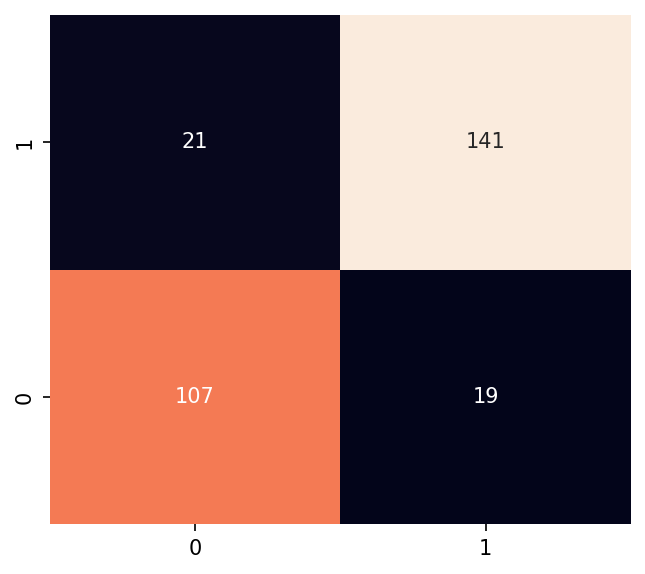

In [8]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_val, dtree.predict(X_val))

import seaborn as sns

fig, ax = plt.subplots(figsize = (5, 4.5), dpi = 150)
sns.heatmap(cm, ax = ax, annot = True, fmt = "d", cbar = False)
ax.set_ylim([0,2])

### 1d: Analysis of classification models

**10 points:** In one sentence, describe why the accuracy of the baseline LDA model is lower than the optimized model from 1c. Consider the nature of the feature transformations and/or decision boundary used in each model.

**Answer**: A linear discriminant model is limited to linear relationships whereas a decision tree model is able to account for the nonlinear relationships between the inputs. 

## Problem 2: Dimensionality reduction (50 points)

In this question, we will work with the MNIST dataset provided below. You will compare various dimensionality reduction techniques using visualization, clustering, and classification.

In [9]:
# MNIST Dataset
from sklearn.datasets import load_digits
import numpy as np

digits = load_digits()

X_mnist = np.array(digits.data)
y_mnist = np.array(digits.target)

### 2a: Principal Component Analysis (PCA)

**10 points:** Apply PCA to the MNIST dataset and create a "scree" plot that shows the explained variance of each component. Use the plot to determine the "rank" of the MNIST dataset.



61


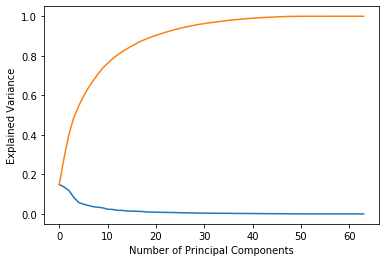

In [10]:
#Your code here.
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca_model = PCA()
pca_model.fit(X_mnist)
X_k = pca_model.transform(X_mnist)

evr = pca_model.explained_variance_ratio_
fig, ax = plt.subplots()
ax.plot(range(len(evr)), evr)
ax.plot(range(len(evr)), np.cumsum(evr))
ax.set_xlabel('Number of Principal Components')
ax.set_ylabel('Explained Variance');
print(np.linalg.matrix_rank(X_mnist))

Rank of MNIST data: 61

### 2b: Dimensional reduction withe PCA

**10 points:** Utilize PCA to reduce the dimensionality of the MNIST dataset to 9 and save the result as `PCA_mnist`.

Create a scatter plot of the first two principal components with each point color-coded by its label (a legend is not required).

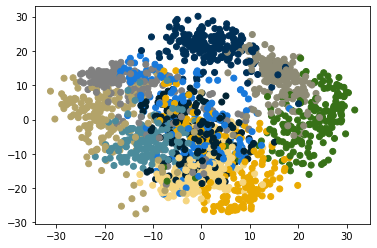

In [11]:
#Your code here.
clrs = np.array(['#003057', '#EAAA00', '#4B8B9B', '#B3A369', '#377117', '#1879DB', '#8E8B76', '#F5D580', '#002233', '#808080'])

pca_model = PCA(n_components=9)
pca_model.fit(X_mnist)
PCA_mnist = pca_model.transform(X_mnist)

plt.scatter(PCA_mnist[:, 0], PCA_mnist[:, 1], c = clrs[y_mnist])

In [12]:
assert sum(PCA_mnist.shape) == 1806
assert np.isclose(PCA_mnist.max(), 35.4873591316505, atol=1e-2)

### 2c: Clustering digits in PCA space

**10 points:** Use k-means clustering with `n_clusters=10` to create clusters using both the original dataset and 9-dimensional projection. Compare the average "silhouette score" of both clustering models:

* sil_score_full: Silhouette score for the clusters created with the original dataset (no dimensional reduction)
* sil_score_PCA: Silhouette score for clusters created with the 9-dimensional PCA dataset

**Note:** To pass the auto-graders you will need to utilize the `scikit-learn` implementation of `KMeans` with `random_state=1213`. You may receive full credit if you use other implementations.

In [13]:
#Your code here.
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

model = KMeans(n_clusters=10, random_state=1213)
y_full = model.fit_predict(X_mnist)
y_PCA = model.fit_predict(PCA_mnist)

sil_score_full = silhouette_score(X_mnist, y_full)
sil_score_PCA = silhouette_score(PCA_mnist, y_PCA)

print(sil_score_full)
print(sil_score_PCA)
print(sil_score_full + sil_score_PCA)

0.18234307932135307
0.2796844903450525
0.46202756966640557


In [ ]:
assert np.isclose(sil_score_full + sil_score_PCA, 0.3628780909259792)

### 2d: Classification with clustering

Next you will convert your clustering results into a classification by using the most common label in a given cluster to label the cluster. The `assign_labels` function provided below will help with this task: it takes labels from a clustering algorithm (`y_cluster`) and the true labels (`y_label`) and provides the prediction if the most common label within a cluster is used to label the entire cluster.

In [14]:
def assign_labels(y_cluster, y_label):
    y_predict = np.zeros(len(y_cluster))
    for i in range(10):
        collect_label = y_label[y_cluster == i]
        count_label = np.bincount(collect_label)
        common_label = np.argmax(count_label)
        y_predict[y_cluster == i] = common_label
    return y_predict

**10 points:** Utilize this function along with the clustering results to calculate the accuracy of a classification prediction with the full dataset and the 9-dimensional PCA dataset:

* acc_full: The accuracy score with clusters from k-means applied to the full-dimensional dataset.
* acc_PCA: The accuracy score with clusters from the 9-dimensional PCA dataset.

In [16]:
#Your code here.
y_predict_full = assign_labels(y_full, y_mnist)
y_predict_pca = assign_labels(y_PCA, y_mnist)

acc_full = accuracy_score(y_mnist, y_predict_full)
print(acc_full)
acc_PCA = accuracy_score(y_mnist, y_predict_pca)
print(acc_PCA)

print(acc_full - acc_PCA)

0.7918753478018921
0.7851975514746801
0.006677796327211993


In [ ]:
assert np.isclose(acc_full - acc_PCA, 0.00222593210907)

### 2e: LDA

**10 points:** Apply LDA to the MNIST dataset without any train/test splitting. Report the accuracy as `acc_LDA` and create a scatter plot of the first two LDA components color-coded by label.

0.9638286032276016


/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Text(0, 0.5, '2nd component')

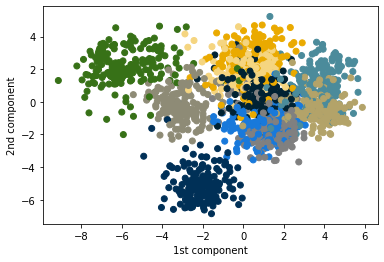

In [17]:
#Your code here.
lda = LinearDiscriminantAnalysis()
lda.fit(X_mnist, y_mnist)

y_predict_lda = lda.predict(X_mnist)

acc_LDA = accuracy_score(y_mnist, y_predict_lda)

print(acc_LDA)

X_mnist_lda = lda.transform(X_mnist)
fig, ax = plt.subplots()
ax.scatter(X_mnist_lda[:,0], X_mnist_lda[:,1], c=clrs[y_mnist])
ax.set_xlabel("1st component")
ax.set_ylabel("2nd component")

In [18]:
assert np.isclose(acc_LDA, 0.9638286032276016)

## Problem 3: Clustering methods (50 points)

In this question, you will work with the Dow dataset. Reading and cleaning the dataset is done in the block below.

In [19]:
import numpy as np
import pandas as pd

df = pd.read_excel('impurity_dataset-validation.xlsx')

def is_real_and_finite(x):
    if not np.isreal(x):
        return False
    elif not np.isfinite(x):
        return False
    else:
        return True
    
all_data = df[df.columns[1:]].values
numeric_map = df[df.columns[1:]].applymap(is_real_and_finite)
real_rows = numeric_map.all(axis = 1).copy().values
X_dow = np.array(all_data[real_rows, :-5], dtype = 'float')
y_dow = np.array(all_data[real_rows, -3], dtype = 'float')
y = y_dow.reshape(-1, 1)

### 3a: Data preparation

**10 points:** Preprocess the Dow dataset as described below. Obtain a matrix named `X` as a result of the following steps:

- Standardize `X_dow` using the "standard scaler"
- Project the standardized `X_dow` onto 2-dimensional space using PCA
- Take every 5th data point

The resulting matrix should be stored as `X`.

In [20]:
#Your code here.
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

X_ss = ss.fit_transform(X_dow)

k = 2
pca_model = PCA(n_components=k)
pca_model.fit(X_ss)
PCA_dow = pca_model.transform(X_ss)
X = PCA_dow[::5]

In [21]:
assert sum(X.shape) == 1136
assert np.isclose(X.sum(), -10.339832285266766)

** NOTE **: If you couldn't get the autograder in the previous question to work, run the next cell to read in the data in the matrix X. 

In [ ]:
X = pd.read_csv("X_PCA_dow.csv").values

### Implementation of k-means


The k-means algorithm is an iterative type of algorithm that pursues the following expectation-maximization:

- **Expectation**: expect that the points close to the center of a cluster belong to that cluster
- **Maximization**: maximize the proximity of points to the center of a cluster by moving the center

In this sub-problem, you will implement the k-means algorithm with several helper functions provided below.

In [27]:
def dist(pt1, pt2):
    return np.sqrt(sum([(xi - yi)**2 for xi, yi in zip(pt1, pt2)]))

def expected_assignment(pt, cluster_centers):
    dists = [dist(pt, ci) for ci in cluster_centers]
    min_index = dists.index(min(dists))
    return min_index

def new_centers(cluster_points, centers):
    centers = list(centers)
    for i, ci in enumerate(cluster_points):
        if ci != []:
            centers[i] = np.mean(ci, axis = 0)
    return centers

### 3b: One iteration of k-means

**10 points:** Making use of the functions defined above, apply the k-means algorithm **once** to the dataset and report the resulting new cluster centers in the variable `new_cluster_centers`. The initial guesses are provided below as `old_cluster_centers`, and you should keep the same data structure (e.g. a list of lists) as `new_cluster_centers`.

Also provide a plot that shows the data as a scatter plot with both the old and new cluster centers, where the old centers are blue and new centers are red. You do not need to color-code the data by the predicted clusters (but may if you would like).

In [24]:
old_cluster_centers = ([-4, -1],
                       [0, 5],
                       [0, 1],
                       [0, -2],
                       [5, -2.5],
                       [10, 0],
                       [8, -1])

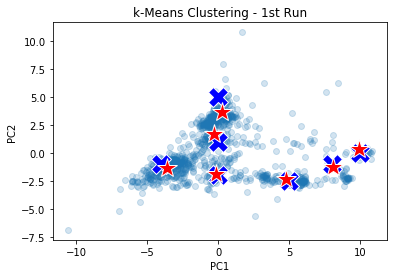

In [28]:
#Your code here.
old_centers = np.array(old_cluster_centers)

fig, ax = plt.subplots()

ax.scatter(X[:,0], X[:,1], alpha=0.2)

clusters=[]
# Which cluster do we "expect" each point to belong to?
for i in range(old_centers.shape[0]):
    clusters.append([])
    
for pt in X:
    cluster_idx = expected_assignment(pt, old_centers)
    clusters[cluster_idx].append(pt)

cluster_centers = new_centers(clusters, old_centers)

# Plot old centers
for i, ci in enumerate(old_centers):
    ax.plot(ci[0], ci[1], marker = 'X', markersize = '20', color = 'b', markeredgecolor = 'w')

# Plot new centers
for i, ci in enumerate(cluster_centers):
    ax.plot(ci[0], ci[1], marker = '*', markersize = '20', color = 'r', mec = 'w')
    
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('k-Means Clustering - 1st Run');

new_cluster_centers = cluster_centers

In [29]:
assert np.isclose(np.array(new_cluster_centers).sum(axis = 0)[0], 19.014994848111172)
assert np.isclose(np.array(new_cluster_centers).mean(axis = 1)[1], 1.9692499139370585)

### 3c: k-means function

**10 points:** In this problem, you will define a function `kmeans` that implements the k-means alogrithm until the pre-defined convergence criterion is satistified. The `kmeans` function takes the following arguments:

- `X`: dataset (numpy array)
- `centers`: initial guesses for cluster centers (numpy array)

Note that the number of clusters will be implicitly defined by the number of rows in the `centers` array.

**Convergence criterion**: the cluster assignments do not change between two iterations (alternate stopping criteria will receive partial credit).

Your `kmeans` function should return `new_center` (numpy array) and `clusters` (list of lists with the indices of the points in each cluster).

In [30]:
def kmeans(X, centers):
    #Your code here.
    old_center = np.array(centers)
    max_dist = 1e6
    tol=0.001
    while max_dist > tol:
        clusters = []
        for i in range(old_center.shape[0]):
            clusters.append([])
            
        for pt in X:
            cluster_idx = expected_assignment(pt, old_center)
            clusters[cluster_idx].append(pt)
            
        new_center = new_centers(clusters, old_centers)
        
        max_dist = 0
        for i in range(old_center.shape[0]):
            dist = np.linalg.norm(old_center[i] - new_center[i])
            if max_dist < dist:
                max_dist = dist
                
        old_center = np.array(new_center)
        
    return np.array(new_center), clusters

In [31]:
centers, clusters = kmeans(X, np.array(old_cluster_centers))

assert type(centers) == np.ndarray, "wrong data type for centers"
assert type(clusters) == list, "wrong data type for clusters"
assert np.isclose(centers.mean(axis = 1)[2], 0.4622251837280602), "wrong cluster centers"
assert len(clusters[0]) == 388, "wrong clusters"

## Implementation of mean shift


The mean shift algorithm is also an iterative type of algorithm, but unlike the k-means, it is density-based rather than expectation-maximization based. You may find the helper functions defined below useful through this problem.

In [32]:
def get_distance(x1, x2):
    return np.linalg.norm(x1 - x2, 2)

def get_nearby_points(x, x_list, bandwidth):
    dist_pairs = []
    for i, xi in enumerate(x_list):
        dist = get_distance(x, xi)
        dist_pairs.append([dist, i, xi])
    in_window = [pt[-1] for pt in dist_pairs if pt[0] <= bandwidth]
    return in_window

def get_new_centroid(old_centroid, x_list, bandwidth):
    in_range = get_nearby_points(old_centroid, x_list, bandwidth)
    if len(in_range) == 0:
        new_centroid = old_centroid
    else:
        new_centroid = np.array(in_range).mean(axis = 0)
    return new_centroid

### 3d: One iteration of mean shift 

**10 points:** One of the advantages of mean shift is that the number of clusters does not have to be specified ahead of time. This can be achieved by using each data point as an initial guess for a cluster center. Use every third datapoint (`X[::3]`) as an initial guess of a cluster center and apply one iteration of mean shift.

Use a bandwidth of 10 and plot the new centroids after one iteration as red markers and the original data with blue markers (setting `alpha=0.3` for the original data is recommended).

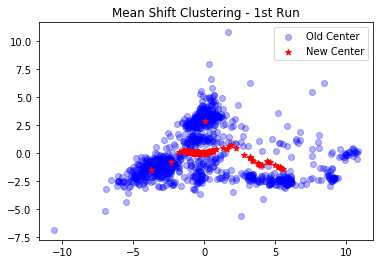

In [33]:
#Your code here.
r = 10

def mean_shift_iteration(x_list, X, r):
    centroids = []
    for centroid in x_list:
        new_centroid = get_new_centroid(centroid, X, r)
        centroids.append(new_centroid)
    return centroids

new_centroids = mean_shift_iteration(X[::3], X, r)

news = np.array(new_centroids)

fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], color = 'b', alpha = 0.3)
ax.scatter(news[:,0], news[:,1], marker='*', color = 'r')

ax.set_title('Mean Shift Clustering - 1st Run')
ax.legend(['Old Center', 'New Center', 'Entire Data Points', 'Points nearby the Center'])

### 3e: Mean Shift Function

**10 points:** Implement a function, `mean_shift`, that takes three arguments:

* initial_guess: A numpy array of cluster centers or points that should be used as the initial guess.
* X: A numpy array of all data points.
* r: The "bandwidth" used by the algorithm

The function should return the following:

* centroids: A list of the **unique** centroids determined by the mean shift algorithm.
* clusters: A list of lists, where each list contains the points that belong to a given cluster.

You may use the `unique_points` function below which will take a list of points and return only the unique points (to within a tolerance).

**Hint:** The `expected_assignment` function can be used to assign points to a centroid, similar to kmeans.

In [34]:
def unique_points(pt_list, tol=1e-5):
    uniques = [np.array(pt_list[0])]
    for pt in pt_list:
        dist_list = [np.linalg.norm(np.array(pt)-u) for u in uniques]
        if min(dist_list) > tol:
            uniques.append(np.array(pt))
    return uniques

In [35]:
def mean_shift(initial_guess, X, r):
    #Your code here.
    old_idxs = []
    new_idxs = [1]
    centroids = initial_guess

    while old_idxs != new_idxs:
        old_idxs = new_idxs
        new_idxs = []
        
        centroids = mean_shift_iteration(centroids, X, r)
        centroids = unique_points(centroids)
        
        clusters = []
        for i in range(len(centroids)):
            clusters.append([])
            
        for pt in X:
            cluster_idx = expected_assignment(pt, centroids)
            clusters[cluster_idx].append(pt)
            new_idxs.append(cluster_idx)
            
    return centroids, clusters

In [36]:
centers, clusters = mean_shift(X[::10], X, 3)
assert np.isclose(np.array(centers).sum(), 13.73777579670531)
assert np.isclose((centers[1] - centers[2])[0], -4.940210121254157)

## Problem 4: Generative Models (55 points)

In this problem you will continue to work with the Dow dataset, which is re-loaded here for convenience. You will compare various types of generative models and evaluate their ability to generate time series data.

In [37]:
df = pd.read_excel('impurity_dataset-validation.xlsx')

def is_real_and_finite(x):
    if not np.isreal(x):
        return False
    elif not np.isfinite(x):
        return False
    else:
        return True
    
all_data = df[df.columns[1:]].values
numeric_map = df[df.columns[1:]].applymap(is_real_and_finite)
real_rows = numeric_map.all(axis = 1).copy().values
X_dow = np.array(all_data[real_rows, :-5], dtype = 'float')
y_dow = np.array(all_data[real_rows, -3], dtype = 'float')
y = y_dow.reshape(-1, 1)

## One-dimensional Generative Models

In the following three problems you will work with the `x2:Primary Column Tails Flow` column of the Dow dataset to visualize and re-create the distribution.

### 4a: Histograms

**10 points:** Plot histograms of the "Primary Column Tails Flow" with 10, 20, and 40 bins.

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


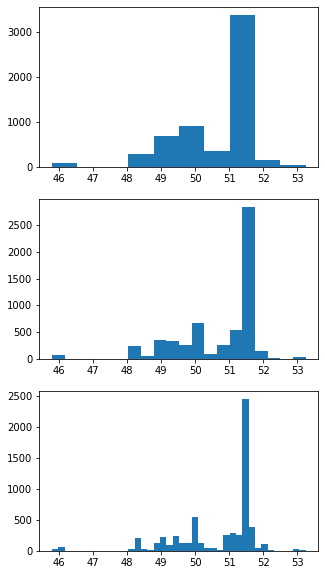

In [38]:
#Your code here.
import matplotlib.pyplot as plt

n_bins = [10, 20, 40]
fig, axes = plt.subplots(3, figsize=(5,10))

for i, bins in enumerate(n_bins):
    axes[i].hist(df["x2:Primary Column Tails Flow"], bins=bins)

### 4b: Gaussian Mixture Model

**15 points:** Use the Bayesian Information Criterion to identify the optimal Gaussian Mixture Model (GMM) to reproduce the distribution, assuming that the optimum model contains 5 or fewer components. Note: Set the `covariance_type` in GMM as `full`.  

* Store the optimal GMM model as `gmm_opt`.
* Use the GMM model to create 1000 synthetic data points and store them in an array as `gmm_sample`.

**Note:** The auto-grader may not pass due to issues with the random state. Re-setting `np.random.seed(1213)` should alleviate the issue.

1754.3109452774138


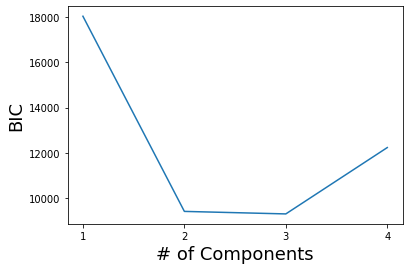

In [39]:
np.random.seed(1213)
#Your code here.
from sklearn.mixture import GaussianMixture

X = X_dow[:,1].reshape(-1,1)
n_components = np.arange(1, 5)

BICs = []
for n in n_components:
    gmm_n =  GaussianMixture(n, covariance_type="full").fit(X)
    bic = gmm_n.bic(X)
    BICs.append(bic)
    
fig, ax = plt.subplots()
ax.plot(n_components, BICs)
ax.set_xlabel('# of Components', size = 18);
ax.set_ylabel('BIC', size = 18)
ax.set_xticks(n_components);

gmm_opt =  GaussianMixture(3, covariance_type="full").fit(X)

print(gmm_opt.bic(np.array([[0],[1]])))

gmm_sample = gmm_opt.sample(1000)[0]

In [40]:
assert np.isclose(gmm_opt.bic(np.array([[0],[1]])), 1754.310945277471)
assert np.isclose(gmm_sample.sum(), 50727.969999639834)

### 4c: Kernel Density Estimation (KDE) and comparison

**10 points:** Train a KDE model with bandwidth of 0.2 and a Gaussian kernel. 

* Store the KDE model as `kde_1d`.
* Use the KDE model to create 1000 synthetic data points and store them as `kde_sample`.
* Create three histograms for (1) the original data, (2) the GMM synthetic data, and (3) the KDE synthetic data. Use 20 bins for each. You can use three separate plots or use the same plot with transparent bars.

Text(0.5, 1.0, 'KDE')

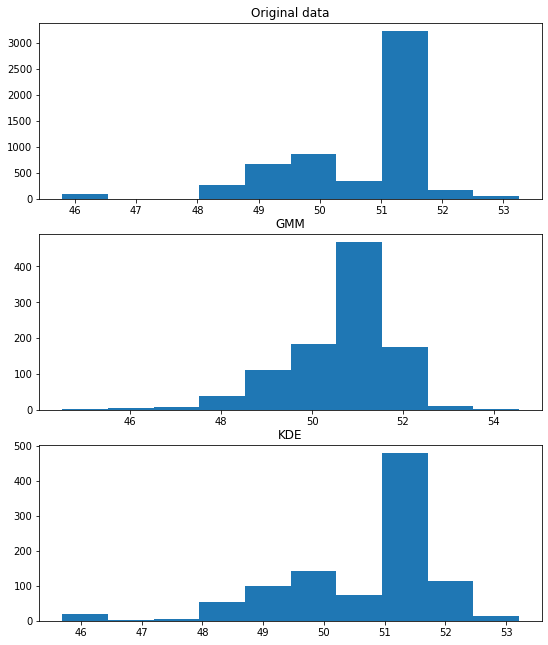

In [41]:
np.random.seed(1213)

#Your code here.
from sklearn.neighbors import KernelDensity

kde_1d = KernelDensity(kernel = 'gaussian', bandwidth = 0.2)
kde_1d.fit(X);
kde_sample = kde_1d.sample(1000)

fig, axes = plt.subplots(3, figsize=(9,11))
axes[0].hist(X)
axes[0].set_title("Original data")
axes[1].hist(gmm_sample)
axes[1].set_title("GMM")
axes[2].hist(kde_sample)
axes[2].set_title("KDE")

In [42]:
assert np.isclose(np.sum(kde_1d.score_samples(np.array([[0],[1]]))), -51303.56830044315)
assert np.isclose(kde_sample.sum(), 50689.09485119172)

## High-dimensional Generative Model and Time series analysis

In the following two problems you will create a generative model for the full `X_dow` dataset and evaluate whether or not it is capable of generating a time series dataset.

### 4d: High-dimensional KDE model

**10 points:** Create a KDE model of the full Dow dataset with a bandwidth of 0.1 and a Gaussian kernel.

* Save the resulting model as `kde_full`.
* Use the kde model to create a synthetic dataset with the same number of points as the original dataset. 
* Create a scatter plot of the `Primary Column Tails Flow` (column 1) and the `Primary Column Reflux Drum Pressure` (column 7) for the original data and synthetic data. Use two separate scatter plots.

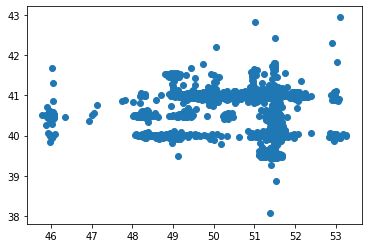

In [43]:
#Your code here.
kde_full = KernelDensity(kernel = 'gaussian', bandwidth = 0.1)
kde_full.fit(X_dow);

kde_full_sample = kde_full.sample(X_dow.shape[0])

plt.scatter(X_dow[:,1], X_dow[:,7])

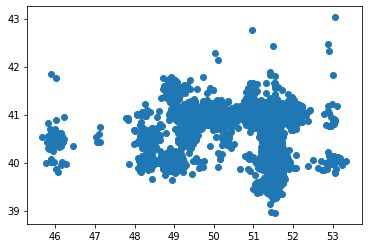

In [44]:
plt.scatter(kde_full_sample[:,1], kde_full_sample[:,7])

### 4e: Auto-correlation analysis

**10 points:** You recall that the Dow dataset is actually a time series, and decide to compare the auto-correlation of the Primary Column Tails Flow between the actual and synthetic datasets generated in the prior problem.

* Calculate the auto-correlation for the real dataset with 1 lag and store it as `autocorr_real`
* Calculate the auto-correlation for the synthetic dataset with 1 lag and store it as `autocorr_synthetic`

In one sentence, describe whether you think the synthetic data is a reliable surrogate for time series analysis based on the results of 4d and 4e.

In [45]:
#Your code here.
from statsmodels.tsa.stattools import acf

autocorr_real = acf(X_dow[:,1], nlags = 1)[1]
print(autocorr_real)
autocorr_synthetic = acf(kde_full_sample[:,1], nlags = 1)[1]
print(autocorr_synthetic)

0.9916222947353828
0.00876680799136835


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


In [ ]:
assert(np.isclose(autocorr_real + 1e4*autocorr_synthetic, 0.35299105438482214))

**Answer**: It is clear that the data generated by KDE is significantly off from the real data. The autocorrelation for KDE generated data shows that the synthetic data is not correlated. 